In [5]:
from IPython.display import Image
import sympy as sp

Backpropagation theory, complete demonstration
http://neuralnetworksanddeeplearning.com/chap2.html

## Computing the output (Activation) from a neural network

The activation $a_{j}^{i}$ of the $j^{th}$ neuron in the $l^{th}$ layer is related to the activations in the $(l-1)^{th}$ layer by the equation 
$$
\begin{eqnarray} 
  a^{l}_j = \sigma\left( \sum_k w^{l}_{jk} a^{l-1}_k + b^l_j \right), \tag{Eq. 1}
\end{eqnarray}
$$

$w^l_{jk}$: the weight for the connection from the $k^{\rm th}$ neuron in the $(l-1)^{th}$ layer to the $j^{th}$ neuron in the $l^{th}$ layer

$a^{l-1}_{j}$: the activation of the $j^{th}$ neuron in the $(l-1)^{th}$ layer

$b^l_j$: the bias of the $j^{\rm th}$ neuron in the $l^{\rm th}$ layer

$\begin{eqnarray} 
  \sigma(z) \equiv \frac{1}{1+e^{-z}}.
\end{eqnarray}$, sigmoid activation function

In compact vector form the Eq.1:
$$
\begin{eqnarray} 
  a^{l} = \sigma(w^l a^{l-1}+b^l),
\tag{Eq.2}\end{eqnarray}
$$

$w^l$: a matrix of weights connecting to the $l^{\rm th}$ layer of neurons: $j = rows$, $k = columns$ in $w^l_{jk}$

Defining as Weighted Input the expression $z_{j}^{l}$:
$$
z^l_j
= \sum_k w^l_{jk} a^{l-1}_k+b^l_j
$$

And in vector form:
$$
z^l \equiv w^l a^{l-1}+b^l
$$

The Eq. 2 in terms of the weighted input: 
$$a^l =
\sigma(z^l)
$$

## Backpropagation starting with the General Quadratic Cost Function

$$
\begin{eqnarray}  C(w,b) =
  \frac{1}{2n} \sum_x \| y(x) - a^{L}\|^2.
\tag{3}\end{eqnarray}
$$

$y = y(x)$: desired output

$x$: training inputs, (sum over the training inputs)

$a^{L}$: vector of activation output (in the output layer L)

$n$: total number of training inputs

The cost function in terms of an average:
$$
C = \frac{1}{n} \sum_x C_x
$$

then $C_x =
\frac{1}{2} \|y-a^L \|^2$

The goal of backpropagation is to compute the partial derivatives $\partial C / \partial w$ and $\partial C / \partial b$ of the cost function, so until now we have: $\partial C_x / \partial w$ and $\partial C_x / \partial b$. For notation purposes we will use: $\partial C_x / \partial w = \partial C / \partial w$ , $\partial C_x / \partial b = \partial C / \partial b$ and $C =
\frac{1}{2} \|y-a^L \|^2$

For backpropagation purposes the cost function MUST be written as a function of the outputs ($a^L$) from the neural network

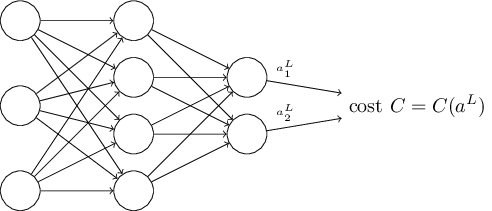

In [2]:
Image("images/cost_function_outputs.png")

In this case, the quadratic cost function CAN be expressed as function of the outputs of the NN in a single training example (x) as follows:
$$
\begin{eqnarray}
  C = \frac{1}{2} \|y-a^L\|^2 = \frac{1}{2} \sum_j (y_j-a^L_j)^2,
\tag{4}\end{eqnarray}
$$

Defining an "error like" helping term $\delta^l_j$ as the partial derivative of the cost with respect of Weighed input $z^l_j$:

$$
\begin{eqnarray} 
  \delta^l_j \equiv \frac{\partial C}{\partial z^l_j}.
\tag{5}\end{eqnarray}
$$

and a vector of errors of the $l$ layer following the Eq. 5 is: $\delta^l = \frac{\partial C}{\partial z^l}$
 




### An equation for the error in the output layer, $\delta^L$

The components of $\delta^L$ vector are given by:

$$
\begin{eqnarray} 
  \delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j),
\tag{BP1}\end{eqnarray}
$$

Derivative of sigmoid function

In [7]:
# Define the variable
z = sp.symbols('z')

# Define the sigmoid function
sigmoid = 1 / (1 + sp.exp(-z))

# Compute the derivative of the sigmoid function with respect to z
sigmoid_derivative = sp.diff(sigmoid, z)

# Display the result
sigmoid_derivative

exp(-z)/(1 + exp(-z))**2

In generalized vector form: 
$$\sigma'(z^L) = \frac{e^{- z^L}}{\left(1 + e^{- z^L}\right)^{2}}$$
$$ = \frac{1}{(1 + e^{- z^L})}-\frac{1}{(1 + e^{- z^L})^2}$$
$$ = \frac{1}{(1 + e^{- z^L})} \left ( 1 -  \frac{1}{(1 + e^{- z^L})} \right )$$
$$\sigma'(z^L) = \sigma(z^L)\left ( 1-\sigma(z^L) \right )$$

Derivative of the quadratic cost function
 $$C = \frac{1}{2} \sum_j (y_j-a^L_j)^2$$ 
 $$\frac{\partial C}{\partial a^L_j} = \frac{\partial}{\partial a^L_j}\frac{1}{2} \sum_j (y_j-a^L_j)^2$$
 $$ = \frac{1}{2} \sum_j \frac{\partial}{\partial a^L_j} (y_j-a^L_j)^2$$
 $$ = \frac{1}{2} \sum_j  -2(y_j-a^L_j)$$
  $$ = \frac{-2}{2} \sum_j (y_j-a^L_j)$$
  $$ = - \sum_j (y_j-a^L_j)$$
  $$ \frac{\partial C}{\partial a^L_j} = \sum_j (a^L_j-y_j)$$
  In vector form: $\frac{\partial C}{\partial a^L_j}$ = $\nabla_a C = (a^L-y)$


In terms of an element by element operations (elementwise operations), also called as Hadamard Product ($\odot$) in matrix form (suitable for numpy) $\delta^L$:

$$\begin{eqnarray} 
  \delta^L = \nabla_a C \odot \sigma'(z^L),
\tag{BP1a}\end{eqnarray}$$

With sigmoid function and quadratic cost function in matrix form:

$$\begin{eqnarray} \delta^L = (a^L-y) \odot \sigma(z^L)\left ( 1-\sigma(z^L) \right )\end{eqnarray}$$

### An equaation for the error $\delta^l$ in terms of the error in the next layer, 